## Gradient Boosting

- [Gradient boosting](https://en.wikipedia.org/wiki/Gradient_boosting) is another ensemble technique for classification and regression. It can be viewed as a "series circuit" of base learners.


- The idea of gradient boosting originates from [Leo Breiman](https://en.wikipedia.org/wiki/Leo_Breiman) and [Jerome Friedman](https://en.wikipedia.org/wiki/Jerome_H._Friedman) (1999).


- The diversity of the base learners is achieved by training them on different targets.


- The base learners are regressors, both for classification and regression.


- Usually, the base learners are decision trees regressors, but in theory they could be any regression algorithm.


- Gradient Boosted Decision Trees (or Gradient Boosting Machine) is a "swiss army knife" method in machine learning. It is invariant to the scale of the feature values and performs well on a wide variety of problems.

### Pseudo Code of Training (w/o Learning Rate)
<img src="gradient_boosting_algorithm.png" width="600px">

### Learning Rate

- instead of step size $\gamma_m$, we use $\eta \cdot \gamma_m$, where $\eta \in (0, 1]$
- $\eta<1$ implements the "slow cooking" idea, and in practice leads to better ensembles than $\eta=1$

<img src="slow_cooking.jpg" width="250px">

### Special Case: Gradient Boosting for Regression

- the loss function is the squared loss: $L(y, F(x)) = \frac{1}{2} \left(y - F(x)\right)^2$
- the initial model is the average target: $F_0(x) = \frac{1}{n} \sum_{i=1}^n y_i$
- pseudo-residuals: $r_{im} = y_i - F_{m-1}(x_i)$
- optimal multiplier: $\gamma_m = \left[\sum_{i=1}^n h_m(x_i)r_{im}\right] / \left[\sum_{i=1}^n \left(h_m(x_i)\right)^2\right]$

**Exercise 1**: Implement a tree based gradient boosting regressor and evaluate it on the Boston Housing data set using 3-fold cross-validation! Use a maximal tree depth of 3!

In [1]:
# Load the Boston Housing data set.
import pandas as pd
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
         'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
df = pd.read_csv('housing_data.txt', delim_whitespace=True, names=names)
df = df.sample(len(df), random_state=42) # data shuffling
X = df.values[:, :-1] # input matrix
y = df['MEDV'].values # target vector

In [2]:
X.shape

(506, 12)

In [3]:
y.shape

(506,)

In [12]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [16]:
class SimpleGradiantBoostingRegressor:
    def __init__(self, n_trees=100, eta=0.1, max_depth=3):
        self.n_trees = n_trees
        self.eta = eta
        self.max_depth= max_depth
        
    def fit(self, X, y):
        self.F0 = np.mean(y)  # best constant model
        r = y - self.F0 # pseudo-residuals
        
        self.trees = []
        for m in range(self.n_trees):
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=m) #random State
            tree.fit(X, r) # fit base learner
            rhat = tree.predict(X) # prediction of the base learner
            gamma = (rhat@r)/(rhat@rhat) # optimal step size
            w = self.eta * gamma
            self.trees.append((w, tree)) # save tree and w
            r -= (w * rhat)
        
        
    def predict(self, X):
        yhat = np.ones(len(X)) * self.F0
        for w, tree in self.trees:
            yhat += w * tree.predict(X)
        return yhat
        

In [17]:
re = SimpleGradiantBoostingRegressor()
re.fit(X, y)

In [18]:
re.predict(X)

array([23.94338117, 31.84403964, 14.5974109 , 23.18869335, 16.53389674,
       20.51149196, 17.62557483, 13.57396085, 20.02974902, 19.1537357 ,
       21.00365235, 18.77811641,  7.77255095, 20.58009835, 19.25299176,
       26.15302545, 19.35018065,  9.13319693, 48.57348633, 15.22903246,
       24.7196627 , 26.65527172, 13.86831478, 21.97822747, 14.95097855,
       15.33661623, 21.58127832, 14.67157346, 19.68720584, 20.47668502,
       20.2642894 , 23.61148237, 16.48740369, 19.79431243, 16.01197271,
       17.44559748, 33.9641267 , 19.12315572, 22.28414065, 23.87685238,
       18.91158592, 29.47223172, 49.05900514, 18.92279053, 23.09613799,
       14.45276541, 14.89674794, 23.87685238, 17.95920624, 25.79465137,
       20.31190662, 35.96893202, 15.80590052, 25.46493393, 46.0662084 ,
       21.29196354, 16.20583887, 31.3541363 , 22.92447383, 17.90951381,
       24.1399609 , 35.04744678, 31.05704042, 19.29881036, 24.63048326,
       18.61714486, 13.63618977, 23.80222937, 29.11514983, 16.50

In [13]:
def evaluate(re, X, y):
    cv = KFold(3, random_state=42, shuffle=True)

    scores_tr = []
    scores_te = []
    for tr, te in cv.split(X):
        re.fit(X[tr], y[tr])
        yhat = re.predict(X)
        scores_tr.append(mean_squared_error(y[tr], yhat[tr])**0.5)
        scores_te.append(mean_squared_error(y[te], yhat[te])**0.5)

    return np.mean(scores_tr), np.mean(scores_te)

In [19]:
evaluate(SimpleGradiantBoostingRegressor(), X, y)

(1.2716614748909418, 3.363000134587033)

**Exercise 2**: Repeat the previous experiment using scikit-learn!

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

In [20]:
 evaluate(GradientBoostingRegressor(random_state=42), X, y)

(1.2716614748909418, 3.36820868174328)

**Exercise 3**: Which tree depth gives the most accurate ensemble?

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

<AxesSubplot: xlabel='max_depth'>

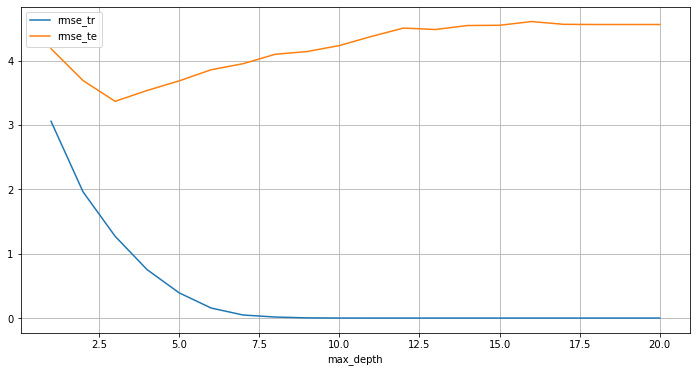

In [29]:
# Professor solution
res = []
for max_depth in range(1, 21):
    print(max_depth, end=' ')
    re = GradientBoostingRegressor(max_depth=max_depth, random_state=42)
    rmse_tr, rmse_te = evaluate(re, X, y)
    res.append({'max_depth': max_depth, 'rmse_tr': rmse_tr, 'rmse_te': rmse_te})

df_res = pd.DataFrame(res).set_index('max_depth')
df_res.plot(figsize=(12, 6), grid=True)

In [30]:
# Optimal max_depth.
df_res['rmse_te'].idxmin()

3

**Exercise 3/B**: How the training and test RMSE changes with the number of trees? (Use a simple train-test split for this experiment!)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

<AxesSubplot: xlabel='n_trees'>

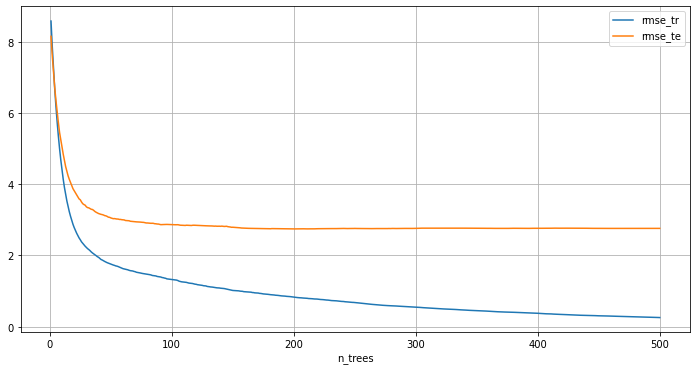

In [32]:
from sklearn.model_selection import ShuffleSplit
tr, te = next(ShuffleSplit(test_size=0.3, random_state=42).split(X))

res = []
re = GradientBoostingRegressor(n_estimators=1, random_state=42)
for n_trees in range(1, 501):
    print(n_trees, end=' ')
    if n_trees > 1:
        re.warm_start = True
        re.n_estimators += 1
    re.fit(X[tr], y[tr])
    yhat = re.predict(X)
    rmse_tr = mean_squared_error(y[tr], yhat[tr])**0.5
    rmse_te = mean_squared_error(y[te], yhat[te])**0.5
    res.append({'n_trees': n_trees, 'rmse_tr': rmse_tr, 'rmse_te': rmse_te})
    
df_res = pd.DataFrame(res).set_index('n_trees')
df_res.plot(figsize=(12, 6), grid=True)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

<AxesSubplot: xlabel='n_trees'>

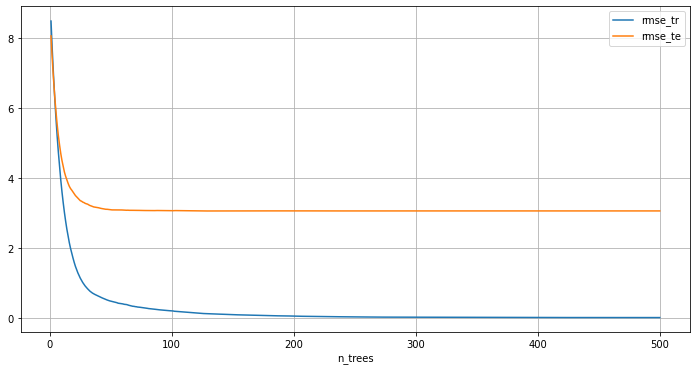

In [33]:
# What happens if we use deeper trees?
from sklearn.model_selection import ShuffleSplit
tr, te = next(ShuffleSplit(test_size=0.3, random_state=42).split(X))

res = []
re = GradientBoostingRegressor(n_estimators=1, max_depth=6, random_state=42)
for n_trees in range(1, 501):
    print(n_trees, end=' ')
    if n_trees > 1:
        re.warm_start = True
        re.n_estimators += 1
    re.fit(X[tr], y[tr])
    yhat = re.predict(X)
    rmse_tr = mean_squared_error(y[tr], yhat[tr])**0.5
    rmse_te = mean_squared_error(y[te], yhat[te])**0.5
    res.append({'n_trees': n_trees, 'rmse_tr': rmse_tr, 'rmse_te': rmse_te})
    
df_res = pd.DataFrame(res).set_index('n_trees')
df_res.plot(figsize=(12, 6), grid=True)    

**Exercise 4**: Apply a random forest and a gradient boosting classifier on the Wisconsin Breast Cancer data set! Use stratified 10-fold cross-validation! The evaluation metric should be the ratio of correct classifications. For both ensemble methods, determine the maximal tree depth that gives the highest accuracy!

In [1]:
# Load the Wisconsin Breast Cancer data set.
import pandas as pd
names = [
    'Sample_code_number', 'Clump_Thickness', 'Uniformity_of_Cell_Size',
    'Uniformity_of_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size',
    'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'
]
df = pd.read_csv('wisconsin_data.txt', sep=',', names=names, na_values='?')
df = df.sample(len(df), random_state=42) # data shuffling
df['Bare_Nuclei'].fillna(0, inplace=True)
X = df[df.columns[1: -1]].values
y = (df['Class'].values / 2 - 1).astype('int')

In [2]:
X.shape, y.shape

((699, 9), (699,))

In [11]:
# evaluate function
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

In [12]:
def evaluate(cl, X, y):
    cv = StratifiedKFold(10, shuffle=True, random_state=42)
    scores = []
    for tr, te in cv.split(X, y):
        cl.fit(X[tr], y[tr])
        yhat = cl.predict(X) # log_loss or regressors use predict_propa
        score = accuracy_score(y[te], yhat[te])
        scores.append(score)
    return np.mean(scores)

In [13]:
# Dummy classifier's accuracy.
from sklearn.dummy import DummyClassifier

In [14]:
evaluate(DummyClassifier(), X, y)

0.6552173913043479

In [15]:
# Logistic regression's accuracy.
from sklearn.linear_model import LogisticRegression

In [16]:
evaluate(LogisticRegression(), X, y)

0.9656314699792962

In [17]:
# gradient boosting, random forest, different max_depth values, ...
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [29]:
GB = []
RF = []

for i in range (1,11):
    print(i)
    gb = evaluate(GradientBoostingClassifier(random_state=42 ,max_depth=i), X, y)
    GB.append({'max_depth': i, 'eva_GB': gb})
    rf = evaluate(RandomForestClassifier(random_state=42, max_depth=i), X, y)
    RF.append({'max_depth': i, 'eva_RF': rf})

1
2
3
4
5
6
7
8
9
10


In [31]:
data1 = pd.DataFrame(GB).set_index('max_depth')
data2 = pd.DataFrame(RF).set_index('max_depth')

In [32]:
data1

,eva
max_depth,
1,0.962774
2,0.957081
3,0.952754
4,0.958509
5,0.958509
6,0.948489
7,0.949917
8,0.945611
9,0.941346


In [33]:
data2

,eva
max_depth,
1,0.947019
2,0.962754
3,0.965631
4,0.964182
5,0.965611
6,0.965611
7,0.969896
8,0.968468
9,0.969896


<AxesSubplot: xlabel='max_depth'>

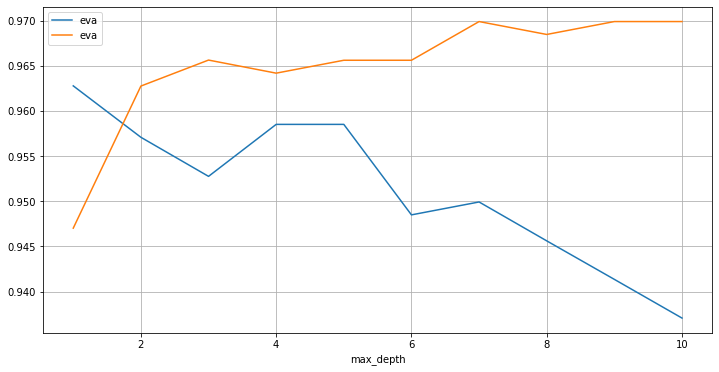

In [41]:
ax = data1.plot(figsize=(12,6))
data2.plot(ax=ax, grid=True)

In [42]:
# Professor Solutions
# gradient boosting, random forest, different max_depth values, ...
res = []
for max_depth in list(range(1, 11)):
    print(max_depth, end=' ')
    gb = GradientBoostingClassifier(max_depth=max_depth, random_state=42)
    rf = RandomForestClassifier(max_depth=max_depth, random_state=42)
    res.append({'max_depth': max_depth, 'RF_acc': evaluate(rf, X, y), 'GB_acc': evaluate(gb, X, y)})

1 2 3 4 5 6 7 8 9 10 

<AxesSubplot: xlabel='max_depth'>

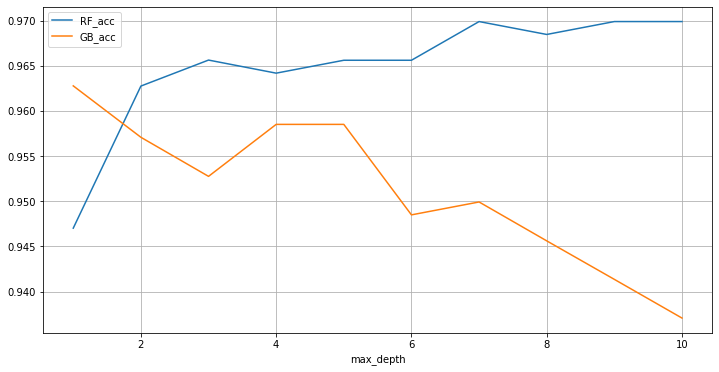

In [43]:
df_res = pd.DataFrame(res).set_index('max_depth')
df_res.plot(figsize=(12, 6), grid=True)

### Gradient Boosting on Steroids

- [XGBoost](https://en.wikipedia.org/wiki/XGBoost) and [LightGBM](https://en.wikipedia.org/wiki/LightGBM) are a highly efficient and flexible implementations of gradient boosting.
- XGBoost started as a research project by Tianqi Chen (in 2014).
- LightGBM was introduced by Microsoft Research (in 2016).

- note: another [LightGBM](https://lightgbm.readthedocs.io/en/stable/Features.html)

**Exercise 5**: Compare XGBoost, LightGBM and scikit-learn's GradientBoostingClassifier on the Wisconsin Breast Cancer problem, in terms of speed and accuracy!

In [44]:
import xgboost
xgboost.__version__

'1.7.3'

In [45]:
import lightgbm
lightgbm.__version__

'3.3.5'

In [56]:
from xgboost import XGBClassifier
evaluate(XGBClassifier(n_estimators=100, max_depth=3), X, y)

0.9585093167701864

In [55]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [66]:
import time

t0 = time.time()
print('acc ', evaluate(XGBClassifier(n_estimators=100, max_depth=3), X, y), '\ntime ', (time.time() - t0))

acc  0.9585093167701864 
time  0.43979501724243164


In [67]:
from lightgbm import LGBMClassifier
evaluate(LGBMClassifier(), X, y)

0.9542443064182194

In [68]:
import time

t0 = time.time()
print('acc ', evaluate(LGBMClassifier(n_estimators=100, num_leaves=8), X, y), '\ntime ', (time.time() - t0))

acc  0.9585300207039337 
time  0.28715991973876953


In [72]:
import time

t0 = time.time()
print('acc ', evaluate(GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42), X, y), '\ntime ', (time.time() - t0))

acc  0.9585093167701864 
time  1.2569808959960938


In [77]:
# Since version 0.21, scikit-learn includes a histogram based
# gradient boosting algorithm that was inspired by LightGBM.

from sklearn.ensemble import HistGradientBoostingClassifier
import time
from sklearn.ensemble import HistGradientBoostingClassifier
t0= time.time()
print('acc:', evaluate(HistGradientBoostingClassifier(max_iter=100, max_leaf_nodes=8, random_state=42), X, y), '\ntime:', time.time() - t0)

acc: 0.9585093167701864 
time: 1.2880544662475586
